In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [ ]:
df.nunique()

,0
Date,1511
Open,1409
High,1400
Low,1397
Close,1398
Volume,1511


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by = 'Date',inplace = True)
df.set_index(df['Date'],inplace = True)

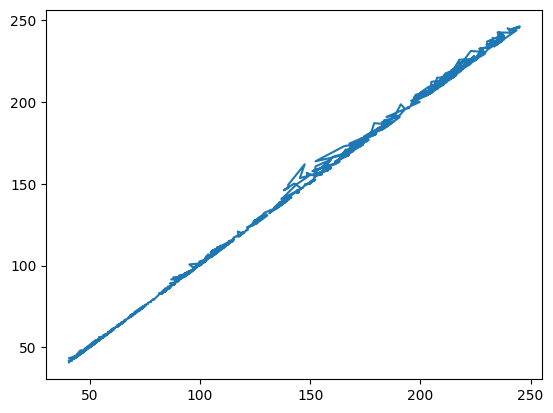

In [ ]:
plt.plot(df['Open'],df['High'])

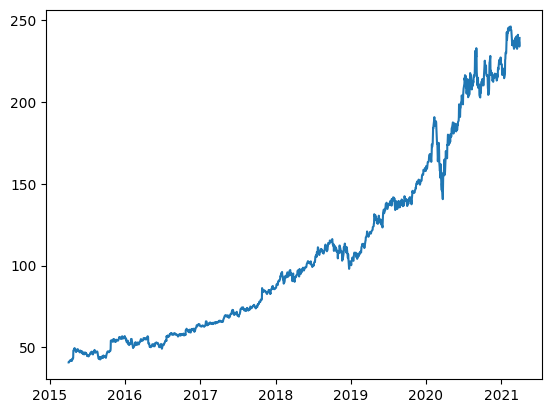

In [ ]:
plt.plot(df.index,df['High'])

<Axes: xlabel='Date', ylabel='High'>

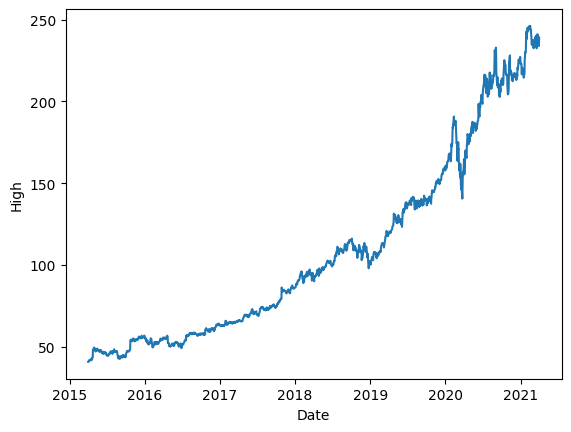

In [ ]:
sns.lineplot(x = 'Date',y = 'High',data = df)

<Axes: >

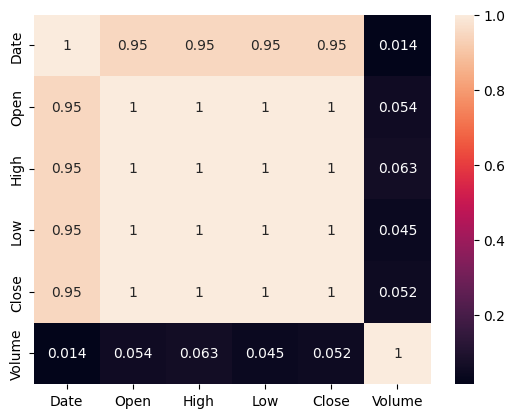

In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

sns.heatmap(df[num_col].corr(),annot = True)

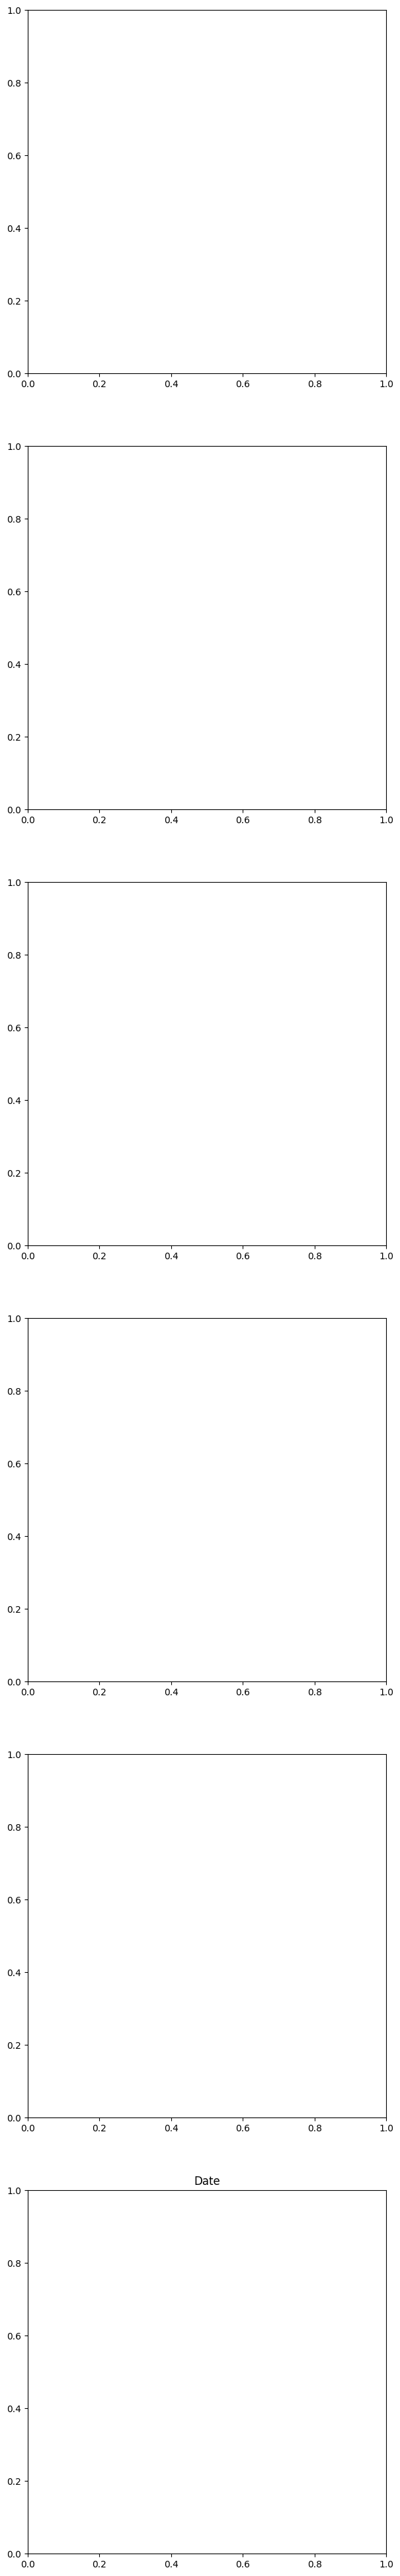

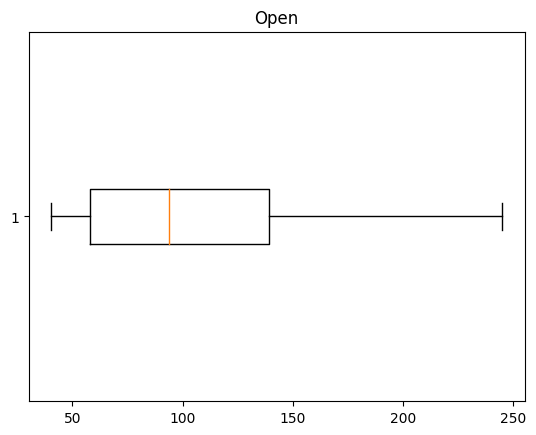

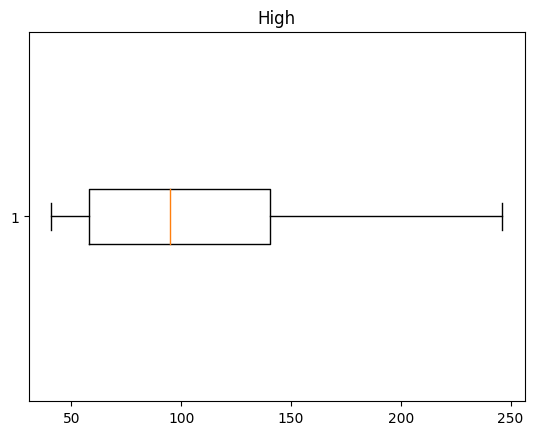

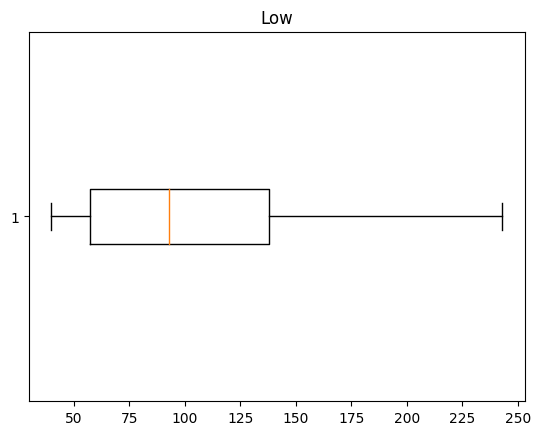

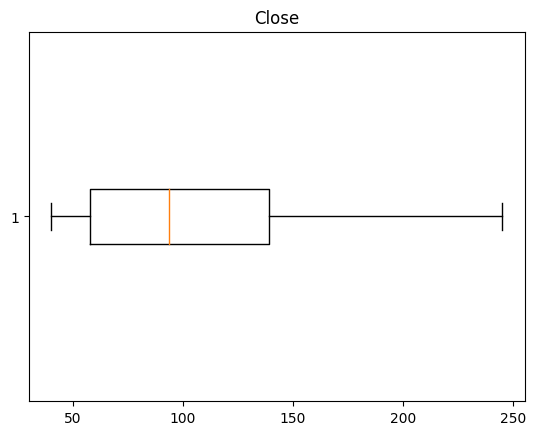

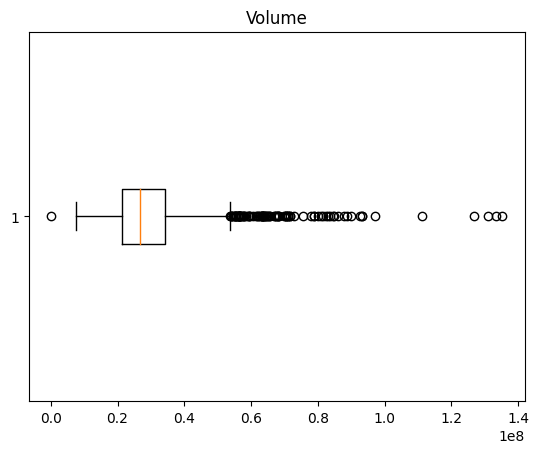

In [ ]:
fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  if df[i].dtype != 'datetime64[ns]':
    axs[j] = plt.boxplot(df[i],vert = False)
  plt.show()

In [ ]:
mean = np.mean(df['Volume'])
std = np.std(df['Volume'])

lower = mean - 2 * std
upper = mean + 2 * std

df2 = df[(df['Volume'] >= lower) & (df['Volume'] <= upper)]

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2015-04-01 16:00:00,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df2 = df2.drop(columns = 'Date')
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df2)

scaled_pd = pd.DataFrame(scaled,columns = df2.columns,index = df2.index)

scaled_pd.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,0.001270,0.000097,0.000937,0.002101,0.577536
2015-04-02 16:00:00,0.001563,0.000000,0.000000,0.000000,0.589741
2015-04-06 16:00:00,0.000000,0.005064,0.000296,0.006155,0.623802
2015-04-07 16:00:00,0.006205,0.005696,0.005868,0.006058,0.419498
2015-04-08 16:00:00,0.005569,0.004625,0.004536,0.005520,0.339930


In [ ]:
X = scaled_pd.drop(columns = 'High')
y = scaled_pd.High

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
X_train = X_train.values.reshape([X_train.shape[0],X_train.shape[1],1])
X_test = X_test.values.reshape([X_test.shape[0],X_test.shape[1],1])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential

In [ ]:
model = Sequential([
    layers.LSTM(200,activation = 'relu',input_shape = (X_train.shape[1],1)),
    layers.Dense(1)
])

model.compile(loss = 'mse',optimizer = 'adam',metrics = ['accuracy'])

model.fit(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 2.3240e-04 - loss: 0.1107 - val_accuracy: 0.0035 - val_loss: 0.0141
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.6257e-04 - loss: 0.0088 - val_accuracy: 0.0035 - val_loss: 0.0016
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 8.0302e-04 - loss: 0.0011 - val_accuracy: 0.0035 - val_loss: 4.1887e-04
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0035 - loss: 3.5604e-04 - val_accuracy: 0.0035 - val_loss: 2.0500e-04
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0018 - loss: 2.0995e-04 - val_accuracy: 0.0035 - val_loss: 1.4708e-04
